In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("cr_loan_w2 (1).csv")

In [5]:
print(data.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [6]:
X = data.drop(columns=['loan_status'])  # Caractéristiques
y = data['loan_status']  # Cible

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
data=pd.read_csv("cr_loan_w2 (1).csv")

In [11]:
# Importer la bibliothèque XGBoost
import xgboost as xgb # type: ignore
import numpy as np
import pandas as pd

# Entraîner un modèle d'arbres boostés par gradient
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Prédire les probabilités avec le modèle sur les données de test
gbt_preds = clf_gbt.predict_proba(X_test)

# Créer un dataframe des cinq premières prédictions de probabilités de défaut
preds_df = pd.DataFrame(gbt_preds[:, 1][0:5], columns=['prob_default'])

# Sélectionner les cinq premières vraies étiquettes des données de test
true_df = y_test.head()

# Concaténer et afficher les prédictions et les vraies étiquettes côte à côte
print(pd.concat([true_df.reset_index(drop=True), preds_df], axis=1))


   loan_status  prob_default
0            1      0.994829
1            0      0.000584
2            0      0.001076
3            0      0.021627
4            0      0.000147


Interprétation des résultats :
Pour le premier prêt :
loan_status est 1, donc le prêt est réellement en défaut.
prob_default est 0.994829, ce qui signifie que le modèle a prédit une très forte probabilité que ce prêt soit en défaut, ce qui est correct.
Pour les prêts suivants (indices 1 à 4) :
loan_status est 0, donc ces prêts ne sont pas en défaut.
prob_default est très faible (proche de 0), ce qui signifie que le modèle a correctement prédit qu'ils ne sont probablement pas en défaut.
Conclusion :
Le modèle XGBoost semble bien prédire les probabilités de défaut pour ces exemples. Le premier prêt en défaut a une haute probabilité de défaut (près de 1), et les autres prêts non-défaillants ont de faibles probabilités de défaut (proche de 0), ce qui correspond aux valeurs réelles.

In [12]:
# Prédire les étiquettes pour le statut de prêt avec le modèle XGBoost
gbt_preds = clf_gbt.predict(X_test)

# Vérifier les valeurs prédites par la méthode predict
print(gbt_preds)

# Afficher le rapport de classification du modèle
# Les noms des cibles sont définis comme 'Non-Default' (non-défaillant) et 'Default' (défaillant)
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))


[1 0 0 ... 0 0 1]
              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      4591
     Default       0.97      0.74      0.84      1301

    accuracy                           0.94      5892
   macro avg       0.95      0.87      0.90      5892
weighted avg       0.94      0.94      0.93      5892



Non-Default (Prêts non-défaillants) :
Précision (precision) : 0.93 – 93% des prêts classés comme non-défaillants sont effectivement non-défaillants.
Rappel (recall) : 0.99 – Le modèle a correctement identifié 99% des vrais prêts non-défaillants.
F1-Score : 0.96 – Un bon équilibre entre précision et rappel pour cette classe.
Default (Prêts défaillants) :
Précision (precision) : 0.97 – 97% des prêts classés comme défaillants sont effectivement défaillants.
Rappel (recall) : 0.74 – Le modèle a capté 74% des prêts réellement en défaut.
F1-Score : 0.84 – Un score décent, mais la détection des défauts est plus faible que celle des non-défaillants.
Globalement (accuracy) :
Exactitude (accuracy) : 0.94 – Le modèle est globalement correct dans 94% des cas.
Moyennes (macro avg et weighted avg) :
Macro avg : Moyenne des métriques pour chaque classe, pondérée également.
Weighted avg : Moyenne pondérée par le nombre d'échantillons dans chaque classe.
Conclusion :
Le modèle est très performant pour identifier les non-défaillants, mais il est un peu moins bon pour identifier tous les défaillants (rappel de 0.74). Cela pourrait suggérer qu'il y a un léger déséquilibre dans les prédictions ou que le modèle favorise la classe "Non-Default". Une stratégie pour améliorer cela pourrait être de tester d'autres seuils de classification ou d'ajuster les hyperparamètres.

In [13]:
# Entraîner le modèle XGBoost sur les données d'entraînement
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Afficher les importances des colonnes à partir du modèle
# Le type d'importance 'weight' indique combien de fois chaque colonne a été utilisée dans les arbres
print(clf_gbt.get_booster().get_score(importance_type='weight'))


{'person_age': 318.0, 'person_income': 750.0, 'person_emp_length': 287.0, 'loan_amnt': 353.0, 'loan_int_rate': 573.0, 'loan_percent_income': 291.0, 'cb_person_cred_hist_length': 196.0, 'person_home_ownership_MORTGAGE': 49.0, 'person_home_ownership_OTHER': 4.0, 'person_home_ownership_OWN': 51.0, 'person_home_ownership_RENT': 69.0, 'loan_intent_DEBTCONSOLIDATION': 59.0, 'loan_intent_EDUCATION': 40.0, 'loan_intent_HOMEIMPROVEMENT': 50.0, 'loan_intent_MEDICAL': 61.0, 'loan_intent_PERSONAL': 34.0, 'loan_intent_VENTURE': 38.0, 'loan_grade_A': 2.0, 'loan_grade_B': 23.0, 'loan_grade_C': 59.0, 'loan_grade_D': 40.0, 'loan_grade_E': 18.0, 'loan_grade_F': 8.0, 'loan_grade_G': 16.0, 'cb_person_default_on_file_N': 30.0}


Le dictionnaire que tu as obtenu représente l'importance des colonnes pour ton modèle XGBoost, en fonction du nombre de fois que chaque colonne a été utilisée dans les arbres de décision. Voici une explication concise :
Les colonnes avec des valeurs plus élevées ont été utilisées plus souvent, ce qui indique qu'elles sont potentiellement plus importantes pour les décisions du modèle.
Par exemple, person_income a été utilisée 750 fois, ce qui en fait une caractéristique très importante. En revanche, loan_grade_A n'a été utilisée que 2 fois, ce qui indique une importance beaucoup plus faible.

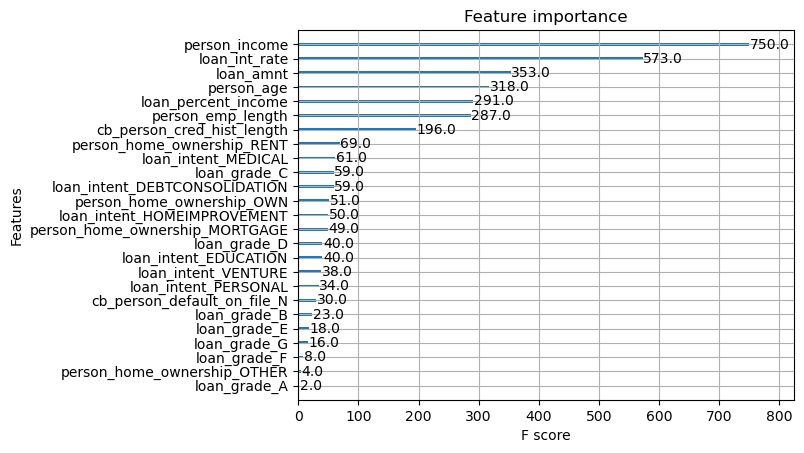

In [14]:
# Importer Matplotlib pour tracer les graphiques
import matplotlib.pyplot as plt

# Tracer les importances des colonnes
xgb.plot_importance(clf_gbt, importance_type='weight')
plt.show()


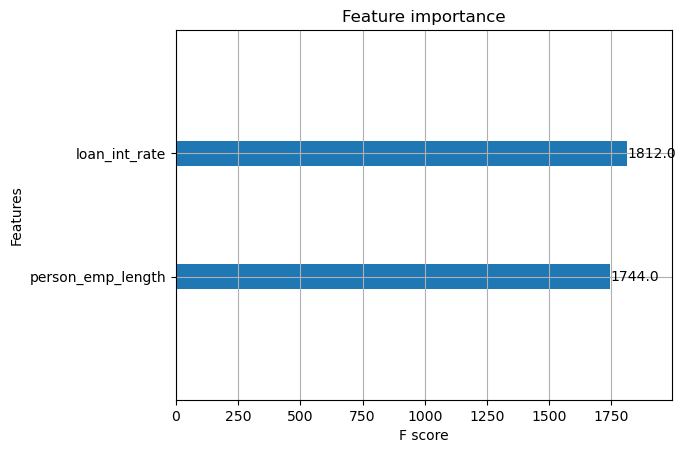

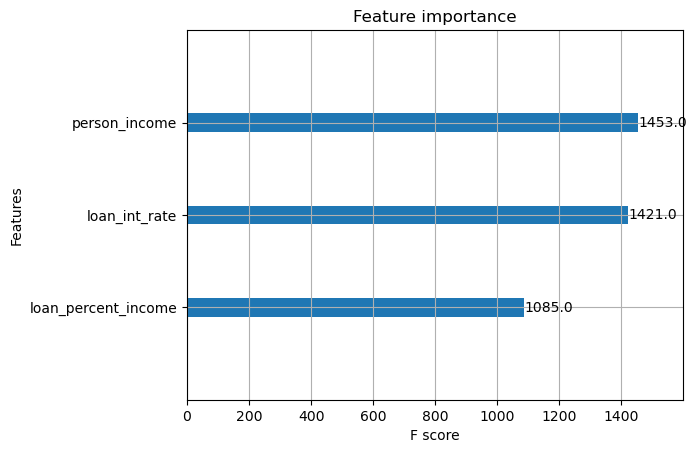

In [16]:
# Importer les bibliothèques nécessaires
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Créer les ensembles de données X2 et X3 à partir des colonnes spécifiées
X2 = data[['loan_int_rate', 'person_emp_length']]
X3 = data[['person_income', 'loan_int_rate', 'loan_percent_income']]

# Diviser les données X2 en ensembles d'entraînement et de test
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Entraîner un modèle XGBoost sur X2_train
clf_gbt2 = xgb.XGBClassifier().fit(X2_train, np.ravel(y_train))

# Tracer l'importance des colonnes pour le modèle entraîné sur X2
xgb.plot_importance(clf_gbt2, importance_type='weight')
plt.show()

# Si nécessaire, diviser X3 et entraîner un modèle sur X3 également
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

# Entraîner un modèle XGBoost sur X3_train
clf_gbt3 = xgb.XGBClassifier().fit(X3_train, np.ravel(y_train))

# Tracer l'importance des colonnes pour le modèle entraîné sur X3
xgb.plot_importance(clf_gbt3, importance_type='weight')
plt.show()


In [17]:
# Importer les bibliothèques nécessaires
from sklearn.metrics import classification_report

# Faire des prédictions sur le loan_status en utilisant chaque modèle
gbt_preds = clf_gbt.predict(X_test)  # Prédictions du modèle sur X_train
gbt2_preds = clf_gbt2.predict(X2_test)  # Prédictions du modèle sur X2_train

# Imprimer le rapport de classification pour le premier modèle
target_names = ['Non-Default', 'Default']
print("Classification report for model trained on X_train:")
print(classification_report(y_test, gbt_preds, target_names=target_names))

# Imprimer le rapport de classification pour le second modèle
print("Classification report for model trained on X2_train:")
print(classification_report(y_test, gbt2_preds, target_names=target_names))


Classification report for model trained on X_train:
              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      4591
     Default       0.97      0.74      0.84      1301

    accuracy                           0.94      5892
   macro avg       0.95      0.87      0.90      5892
weighted avg       0.94      0.94      0.93      5892

Classification report for model trained on X2_train:
              precision    recall  f1-score   support

 Non-Default       0.83      0.96      0.89      4591
     Default       0.67      0.30      0.41      1301

    accuracy                           0.81      5892
   macro avg       0.75      0.63      0.65      5892
weighted avg       0.79      0.81      0.78      5892



Comparaison :
Le modèle entraîné sur toutes les colonnes (X_train) a une meilleure performance globale, avec un meilleur rappel et F1-score, particulièrement pour les prêts défaillants (rappel de 0.74 contre 0.30 pour le modèle simplifié).
Le modèle entraîné sur X2_train (avec seulement deux colonnes : taux d'intérêt du prêt et durée d'emploi) montre des performances beaucoup plus faibles, surtout pour la classe des prêts défaillants, avec un rappel très bas (0.30), ce qui signifie qu'il manque la plupart des prêts défaillants.
Conclusion :
Le modèle avec toutes les colonnes est clairement meilleur pour détecter les défauts, alors que le modèle avec un ensemble de colonnes réduit a des performances nettement moins bonnes. Ajouter plus de colonnes pertinentes permet au modèle d'apprendre mieux et d'identifier plus efficacement les prêts en défaut.